<a href="https://colab.research.google.com/github/AndreaPoteYong/MINERIA_DE_DATOS/blob/main/Pruebas_saber_TyT_2019_VS_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción y análisis comparativo de puntajes Saber TyT 2019 vs 2020 #

### Proyecto final de semestre
**Estudiante:** Andrea Pote Yong  - Betania Alejos
**Materia:** Mineria de datos                          
**Profesor:** Daniel Clavijo                  
**Fecha:** Noviembre 2025

## Introducción

Durante 2019 las pruebas Saber TyT se realizaron de manera presencial.  
En 2020, debido a la pandemia, muchos estudiantes presentaron las pruebas de forma remota, con cambios en:

- Acceso a tecnología (computador, internet)
- Condiciones del hogar (espacios para estudiar, apoyo familiar)
- Modalidad de clases (virtual vs presencial)

Este proyecto analiza cómo factores socioeconómicos, académicos e institucionales influyeron en los puntajes de 2019 y 2020, utilizando un modelo Random Forest para identificar las variables más importantes y evidenciar posibles brechas educativas.


## Hipótesis

Las variables socioeconómicas (como el estrato, la educación de los padres, el acceso a internet y la disponibilidad de dispositivos), junto con características académicas e institucionales, influyeron de manera diferente en el desempeño Saber TyT entre 2019 (presencial) y 2020 (virtual).  
El modelo Random Forest permitirá predecir los puntajes globales y revelar cómo la virtualidad amplificó el impacto de estas variables.


## Metodología

Seguimos los siguientes pasos:

1. Carga y unión de bases de datos 2019 y 2020.
2. Selección de variables socioeconómicas, académicas e institucionales.
3. Limpieza y tratamiento de valores faltantes.
4. Exploración de datos (EDA) con gráficos descriptivos.
5. Construcción de un pipeline con preprocesamiento y Random Forest.
6. Entrenamiento y evaluación del modelo.
7. Análisis de importancia de variables y comparación entre años.



In [3]:
# ============================================
#   1. Importación de librerías
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("Librerías cargadas.")



Librerías cargadas.


In [ ]:
# ============================================
#   2. Cargar datos
# ============================================

from google.colab import files

print("Sube archivo 2019")
uploaded_2019 = files.upload()

print("Sube archivo 2020")
uploaded_2020 = files.upload()

name2019 = list(uploaded_2019.keys())[0]
name2020 = list(uploaded_2020.keys())[0]

df2019 = pd.read_excel(name2019)
df2020 = pd.read_excel(name2020)

print("Datasets cargados correctamente.")

Sube archivo 2019


Saving Resultados_Saber_TyT_Genericas_2019-2_20251119.xlsx to Resultados_Saber_TyT_Genericas_2019-2_20251119.xlsx
Sube archivo 2020


Saving Resultados_Saber_TyT_Genéricas_2020-1_20251119.xlsx to Resultados_Saber_TyT_Genéricas_2020-1_20251119.xlsx
Datasets cargados correctamente.


In [4]:
# ============================================
#   3. Crear columna AÑO y unir
# ============================================


# Leer archivos Excel completos
df2019 = pd.read_excel("/content/Resultados_Saber_TyT_Genericas_2019-2_20251119.xlsx")
df2020 = pd.read_excel("/content/Resultados_Saber_TyT_Genéricas_2020-1_20251119.xlsx")

# Crear columna AÑO
df2019["AÑO"] = 2019
df2020["AÑO"] = 2020

# Unir ambos datasets
df = pd.concat([df2019, df2020], ignore_index=True)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)
print(df.columns.tolist())


['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DISC_FISICA', 'ESTU_DISC_SISTEM', 'ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC', 'ESTU_DISC_VISUALCEGUE', 'ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC', 'ESTU_DISC_ESPAUTISTA', 'ESTU_DISC_SORDOCEGUERA', 'ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_AREARESIDE', 'ESTU_COLE_TERMINO', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_OTROCOLE_TERMINO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_CURSODOCENTESIES', 'ESTU_CURSOIESAPOYOEXTERNO', 'ESTU_CURSOIESEXTERNA', 'ESTU_SIMULACROTIPOICFES', 'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC', 'ESTU_TIPODOCUMENTOSB1

In [5]:
# ============================================
#   4. Selección de variables claves
# ============================================

variables_clave = [
    'PUNT_GLOBAL',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_GENERO',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENESERVICIOTV',
    'FAMI_TIENECONSOLAVIDEOJUEGOS',
    'FAMI_CUANTOSCOMPARTEBAÑO',
    'ESTU_METODO_PRGM',
    'MOD_RAZONA_CUANTITAT_PUNT',
    'MOD_LECTURA_CRITICA_PUNT',
    'MOD_COMPETEN_CIUDADA_PUNT',
    'MOD_INGLES_PUNT',
    'MOD_COMUNI_ESCRITA_PUNT',
    'AÑO'
]


# Filtrar el DataFrame
df_model = df[variables_clave]

print(df_model.head())


   PUNT_GLOBAL FAMI_ESTRATOVIVIENDA               FAMI_EDUCACIONPADRE  \
0           71            Estrato 2  Técnica o tecnológica incompleta   
1           88            Estrato 3                 Primaria completa   
2           85            Estrato 2  Técnica o tecnológica incompleta   
3           90                  NaN                               NaN   
4           91            Estrato 3                 Primaria completa   

                    FAMI_EDUCACIONMADRE ESTU_GENERO FAMI_TIENEINTERNET  \
0      Técnica o tecnológica incompleta           M                 Si   
1                     Primaria completa           F                 Si   
2      Técnica o tecnológica incompleta           M                 Si   
3                                   NaN           M                NaN   
4  Secundaria (Bachillerato) incompleta           M                 Si   

  FAMI_TIENECOMPUTADOR FAMI_TIENESERVICIOTV FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                   Si                  

In [6]:
# ============================================
# 5. Limpieza de valores
# ============================================

# Columnas categóricas
cat_cols = ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE',
            'FAMI_EDUCACIONMADRE', 'ESTU_GENERO', 'INST_CARACTER_ACADEMICO']

# Columnas numéricas (si las hay, por ejemplo puntajes parciales)
num_cols = ['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
            'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT']

# Reemplazar "NO_INFORMA" por "DESCONOCIDO"
df[cat_cols] = df[cat_cols].replace("NO_INFORMA", "DESCONOCIDO")

# Llenar valores nulos en categóricas
df[cat_cols] = df[cat_cols].fillna("DESCONOCIDO")

# Llenar valores nulos en numéricas con la mediana
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verificar cambios
print(df[cat_cols].head(10))
print(df[num_cols].head(10))


  FAMI_ESTRATOVIVIENDA               FAMI_EDUCACIONPADRE  \
0            Estrato 2  Técnica o tecnológica incompleta   
1            Estrato 3                 Primaria completa   
2            Estrato 2  Técnica o tecnológica incompleta   
3          DESCONOCIDO                       DESCONOCIDO   
4            Estrato 3                 Primaria completa   
5            Estrato 3  Técnica o tecnológica incompleta   
6          Sin Estrato               Primaria incompleta   
7            Estrato 3                 Primaria completa   
8            Estrato 3               Primaria incompleta   
9            Estrato 1                           Ninguno   

                    FAMI_EDUCACIONMADRE ESTU_GENERO    INST_CARACTER_ACADEMICO  
0      Técnica o tecnológica incompleta           M    INSTITUCIÓN TECNOLÓGICA  
1                     Primaria completa           F  INSTITUCIÓN UNIVERSITARIA  
2      Técnica o tecnológica incompleta           M  INSTITUCIÓN UNIVERSITARIA  
3              

In [7]:
# ============================================
#   6. Separar X (variables) y y (puntaje)
# ============================================

# Variable objetivo
y = df_model["PUNT_GLOBAL"]

# Variables predictoras
X = df_model.drop("PUNT_GLOBAL", axis=1)

# Identificar columnas categóricas y numéricas dentro de las variables clave
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

# 1. Limpieza de valores categóricos
X[cat_cols] = X[cat_cols].fillna("DESCONOCIDO")
X[cat_cols] = X[cat_cols].replace("NO_INFORMA", "DESCONOCIDO")

# 2. Limpieza de valores numéricos
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# 3. Asegurar que columnas numéricas sean numéricas
for col in num_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 4. Verificar resultados
print("Variables predictoras X (primeras filas):")
print(X.head())

print("\nVariable objetivo y (primeras filas):")
print(y.head())

print("\nColumnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)



Variables predictoras X (primeras filas):
  FAMI_ESTRATOVIVIENDA               FAMI_EDUCACIONPADRE  \
0            Estrato 2  Técnica o tecnológica incompleta   
1            Estrato 3                 Primaria completa   
2            Estrato 2  Técnica o tecnológica incompleta   
3          DESCONOCIDO                       DESCONOCIDO   
4            Estrato 3                 Primaria completa   

                    FAMI_EDUCACIONMADRE ESTU_GENERO FAMI_TIENEINTERNET  \
0      Técnica o tecnológica incompleta           M                 Si   
1                     Primaria completa           F                 Si   
2      Técnica o tecnológica incompleta           M                 Si   
3                           DESCONOCIDO           M        DESCONOCIDO   
4  Secundaria (Bachillerato) incompleta           M                 Si   

  FAMI_TIENECOMPUTADOR FAMI_TIENESERVICIOTV FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                   Si                   Si                           No   


In [8]:
# ============================================
#   7. Preprocesamiento + Modelo Random Forest
#   usando PIPELINE
# ============================================

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

print("Pipeline construido .")


Pipeline construido .


In [9]:
# ============================================
#   8. Separar Train/Test
# ============================================


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamaños:", X_train.shape, X_test.shape)


Tamaños: (101555, 16) (43524, 16)


In [10]:
# ============================================
#   9. Entrenar Modelo
# ============================================
pipeline.fit(X_train, y_train)
print("Entrenamiento completado.")



Entrenamiento completado.


In [12]:
# ============================================
#   10. Métricas de evaluación
# ============================================

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 1.4161302661045128
RMSE: 2.194738266994453
R²: 0.9862971586485519


In [13]:
# ============================================
#   11. Importancia de variables
# ============================================

# 1. Obtener OHE desde el pipeline
ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]

# 2. Obtener nombres de las columnas transformadas (OneHotEncoder)
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

# 3. Construir lista total de features finales
feature_names = list(ohe_feature_names) + num_cols

# 4. Importancias del modelo Random Forest
importances = pipeline.named_steps["model"].feature_importances_

# 5. Crear DataFrame ordenado
importance_df = pd.DataFrame({
    "variable": feature_names,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

# Mostrar solo top 20
importance_df.head(20)


,variable,importancia
51,MOD_LECTURA_CRITICA_PUNT,0.462842
54,MOD_COMUNI_ESCRITA_PUNT,0.190158
52,MOD_COMPETEN_CIUDADA_PUNT,0.181859
53,MOD_INGLES_PUNT,0.103405
50,MOD_RAZONA_CUANTITAT_PUNT,0.060739
55,AÑO,0.000324
44,FAMI_CUANTOSCOMPARTEBAÑO_DESCONOCIDO,0.000029
11,FAMI_EDUCACIONPADRE_No sabe,0.000021
31,ESTU_GENERO_F,0.000020
42,FAMI_CUANTOSCOMPARTEBAÑO_3 o 4,0.000020


/tmp/ipython-input-1128677197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


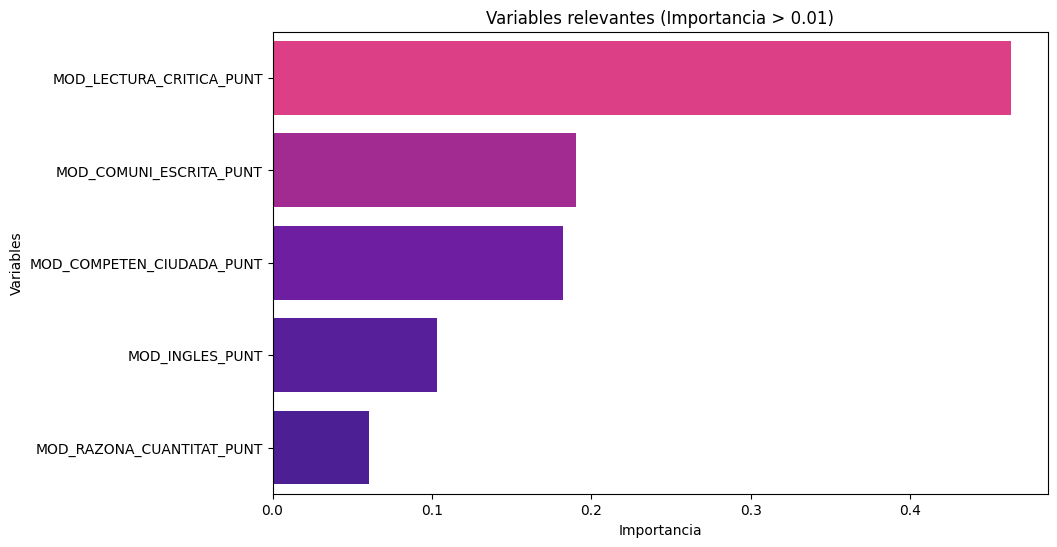

In [14]:
# ============================================
#   12. Gráfico de importancia
# ============================================

filtered = importance_df[importance_df["importancia"] > 0.01]

plt.figure(figsize=(10,6))
sns.barplot(
    data=filtered,
    x="importancia",
    y="variable",
    palette=["#f72585", "#b5179e", "#7209b7", "#560bad", "#480ca8"]
)
plt.title("Variables relevantes (Importancia > 0.01)")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()


In [15]:
# ============================================
#   13. Entrenar modelos independientes
#       para comparar 2019 vs 2020
# ============================================

# Asegurarse de que se usan solo las variables seleccionadas
df_2019 = df_model[df_model["AÑO"] == 2019].copy()
df_2020 = df_model[df_model["AÑO"] == 2020].copy()

def entrenar_por_anio(df_anio):
    # Re-identificar columnas categóricas y numéricas para este subset
    # Esto es crucial porque el pipeline se construyó con las globales
    local_cat_cols = [col for col in cat_cols if col in df_anio.columns]
    local_num_cols = [col for col in num_cols if col in df_anio.columns]


    X = df_anio.drop("PUNT_GLOBAL", axis=1)
    y = df_anio["PUNT_GLOBAL"]

    # Limpieza de valores para X.
    X[local_cat_cols] = X[local_cat_cols].fillna("DESCONOCIDO")
    X[local_cat_cols] = X[local_cat_cols].replace("NO_INFORMA", "DESCONOCIDO")
    X[local_num_cols] = X[local_num_cols].fillna(X[local_num_cols].median())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)

    return {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred)
    }

print("Resultados 2019:")
res2019 = entrenar_por_anio(df_2019)
print(res2019)

print("\nResultados 2020:")
res2020 = entrenar_por_anio(df_2020)
print(res2020)

Resultados 2019:
{'MAE': 1.2530460354826536, 'RMSE': np.float64(1.887735006559701), 'R2': 0.9882674406133845}

Resultados 2020:
{'MAE': 1.405039948340178, 'RMSE': np.float64(2.33093847599397), 'R2': 0.9864562137921209}


/tmp/ipython-input-3210589525.py:24: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(


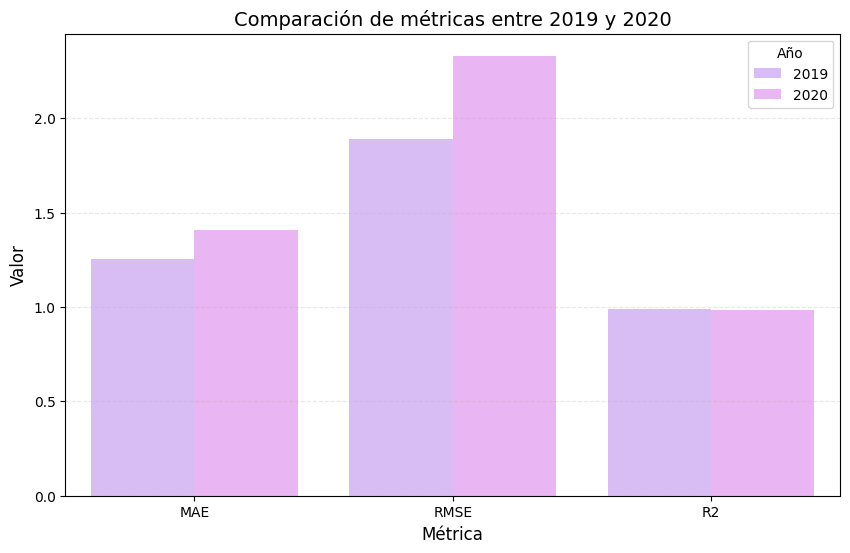

In [16]:
# ============================================
#   14. Gráfico comparativo 2019 vs 2020
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear DataFrame para el gráfico
df_compare = pd.DataFrame({
    "Año": ["2019", "2020"],
    "MAE": [res2019["MAE"], res2020["MAE"]],
    "RMSE": [res2019["RMSE"], res2020["RMSE"]],
    "R2": [res2019["R2"], res2020["R2"]]
})


df_long = df_compare.melt(id_vars="Año", var_name="Métrica", value_name="Valor")


palette = ["#d8b4fe", "#f0abfc", "#c084fc"]
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_long,
    x="Métrica",
    y="Valor",
    hue="Año",
    palette=palette
)

plt.title("Comparación de métricas entre 2019 y 2020", fontsize=14)
plt.xlabel("Métrica", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend(title="Año")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


In [ ]:
# ============================================
#   15.  Importancia por año
# ============================================

def obtener_importancia(df_anio):

    X = df_anio.drop("PUNT_GLOBAL", axis=1)
    y = df_anio["PUNT_GLOBAL"]

    local_cat_cols = [col for col in cat_cols if col in X.columns]
    local_num_cols = [col for col in num_cols if col in X.columns]

    X[local_cat_cols] = X[local_cat_cols].fillna("DESCONOCIDO")
    X[local_cat_cols] = X[local_cat_cols].replace("NO_INFORMA", "DESCONOCIDO")
    X[local_num_cols] = X[local_num_cols].fillna(X[local_num_cols].median())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    pipeline.fit(X_train, y_train)

    # OBTENER LAS COLUMNAS CORRECTAS POST-OHE
    ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(local_cat_cols)

    # ESAS + LAS NUMÉRICAS
    feature_names = list(cat_feature_names) + list(local_num_cols)

    importances = pipeline.named_steps["model"].feature_importances_

    df_imp = pd.DataFrame({
        "Variable": feature_names,
        "Importancia": importances
    }).sort_values("Importancia", ascending=False)

    return df_imp



In [48]:
importancia_2019 = obtener_importancia(df_2019)
importancia_2020 = obtener_importancia(df_2020)


/tmp/ipython-input-1174989677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


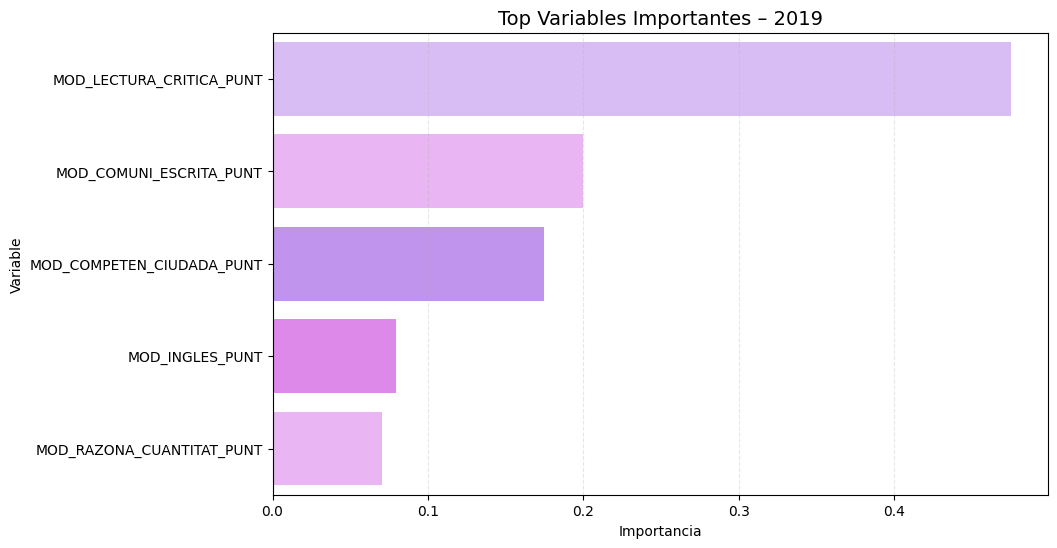

/tmp/ipython-input-1174989677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


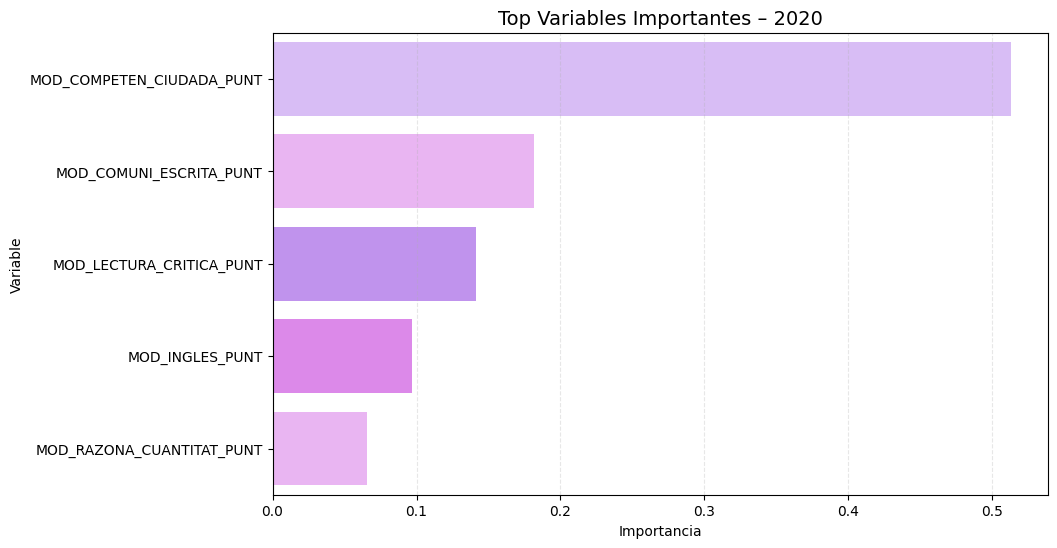

In [51]:
# ============================================
#   16. Gráficos de importancia por año
# ============================================


palette = ["#d8b4fe", "#f0abfc", "#c084fc", "#e879f9", "#f0abfc"]

def graficar_importancia_top(df_importancia, titulo, n_top=5):
    # Ordenamos de mayor a menor
    df_top = df_importancia.sort_values(by="importancia", ascending=False).head(n_top)

    # Gráfico
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_top,
        x="importancia",
        y="variable",
        palette=palette[:len(df_top)]
    )

    plt.title(titulo, fontsize=14)
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.show()


graficar_importancia_top(importancia_2019, "Top Variables Importantes – 2019", n_top=5)
graficar_importancia_top(importancia_2020, "Top Variables Importantes – 2020", n_top=5)



In [52]:
# ============================================
#   Comparación de Importancias 2019 vs 2020
# ============================================

df_comp = importancia_2019.merge(
    importancia_2020,
    on="variable",
    how="outer",
    suffixes=("_2019", "_2020")
).fillna(0)

df_comp


,variable,importancia_2019,importancia_2020
0,AÑO,0.000000,0.000000e+00
1,ESTU_GENERO_F,0.000026,4.354586e-05
2,ESTU_GENERO_M,0.000030,4.006057e-05
3,ESTU_METODO_PRGM_DISTANCIA VITUAL,0.000031,4.368872e-05
4,ESTU_METODO_PRGM_PRESENCIAL,0.000030,3.972123e-05
5,ESTU_METODO_PRGM_SEMI-PRESENCIAL,0.000001,0.000000e+00
6,FAMI_CUANTOSCOMPARTEBAÑO_2,0.000033,3.889657e-05
7,FAMI_CUANTOSCOMPARTEBAÑO_3 o 4,0.000040,4.916071e-05
8,FAMI_CUANTOSCOMPARTEBAÑO_5 o 6,0.000033,3.962350e-05
9,FAMI_CUANTOSCOMPARTEBAÑO_DESCONOCIDO,0.000060,5.197847e-05


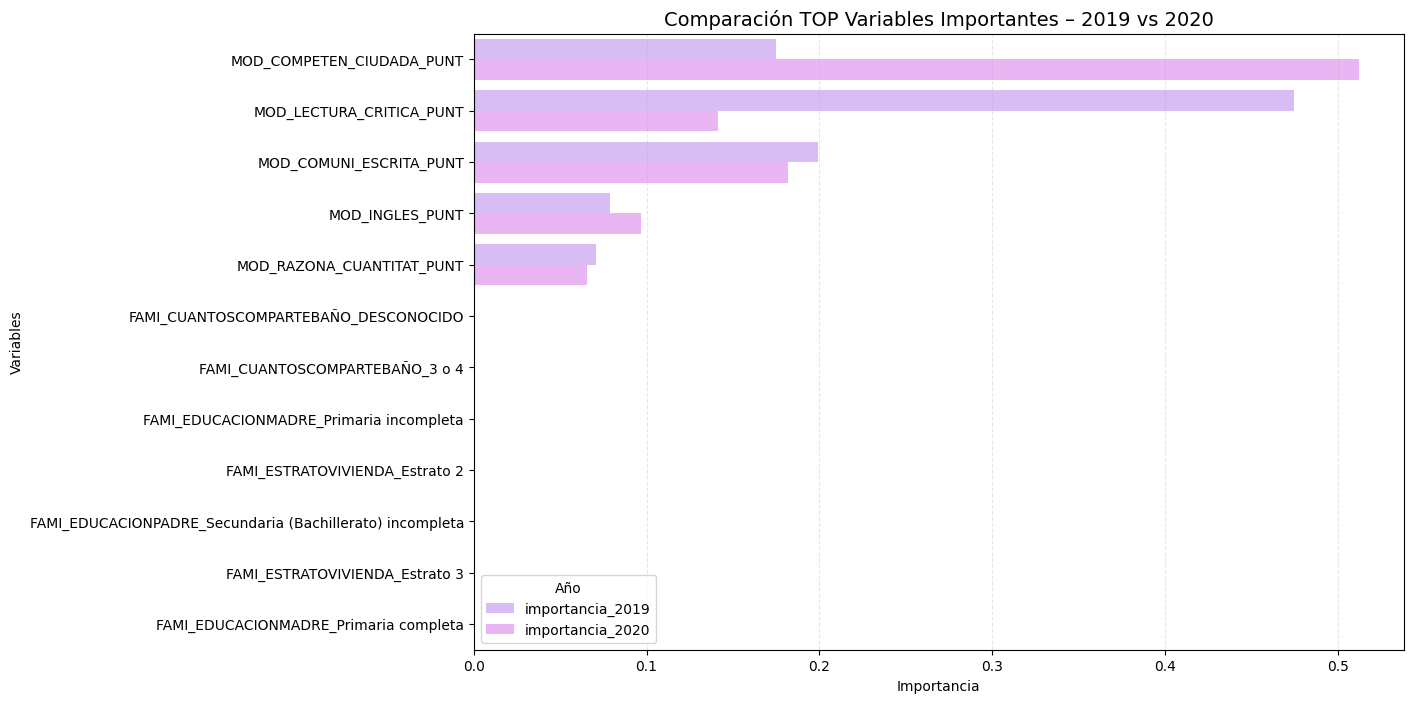

In [55]:
# ============================================
#  Gráfico comparativo
# ============================================

palette_cute = ["#d8b4fe", "#f0abfc", "#c084fc", "#e879f9", "#f0abfc"]

def grafica_comparativa_top(df_comp, n_top=10):
    # Crear ranking por importancia promedio
    df_comp["promedio"] = (df_comp["importancia_2019"] + df_comp["importancia_2020"]) / 2

    # Obtener TOP
    df_top = df_comp.sort_values("promedio", ascending=False).head(n_top)

    # Preparar datos para gráfico
    df_plot = df_top.melt(
        id_vars="variable",
        value_vars=["importancia_2019", "importancia_2020"],
        var_name="Año",
        value_name="Importancia"
    )

    # Gráfico
    plt.figure(figsize=(12,8))
    sns.barplot(
        data=df_plot,
        x="Importancia",
        y="variable",
        hue="Año",
        palette=palette_cute[:2],   # un color para cada año
        dodge=True
    )

    plt.title("Comparación TOP Variables Importantes – 2019 vs 2020", fontsize=14)
    plt.xlabel("Importancia")
    plt.ylabel("Variables")
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.show()


# Llamar la función
grafica_comparativa_top(df_comp, n_top=12)



/tmp/ipython-input-3226646508.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3226646508.py:13: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


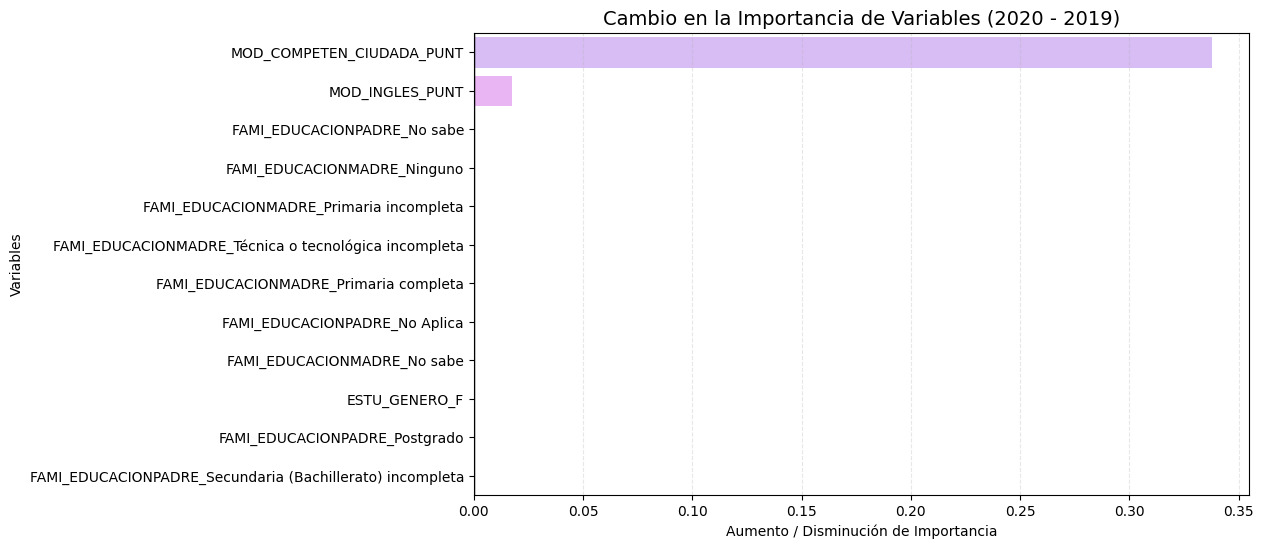

In [58]:
# ============================================
#   Cambios de Importancia 2020 - 2019
# ============================================

palette_cute = ["#d8b4fe", "#f0abfc", "#c084fc", "#e879f9", "#f0abfc"]

df_comp["diferencia"] = df_comp["importancia_2020"] - df_comp["importancia_2019"]

# TOP 12 variables con mayor cambio positivo o negativo
df_diff = df_comp.sort_values("diferencia", ascending=False).head(12)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_diff,
    x="diferencia",
    y="variable",
    palette=palette_cute   #
)

# Línea vertical en cero
plt.axvline(0, color="black", linewidth=1)

plt.title("Cambio en la Importancia de Variables (2020 - 2019)", fontsize=14)
plt.xlabel("Aumento / Disminución de Importancia")
plt.ylabel("Variables")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()



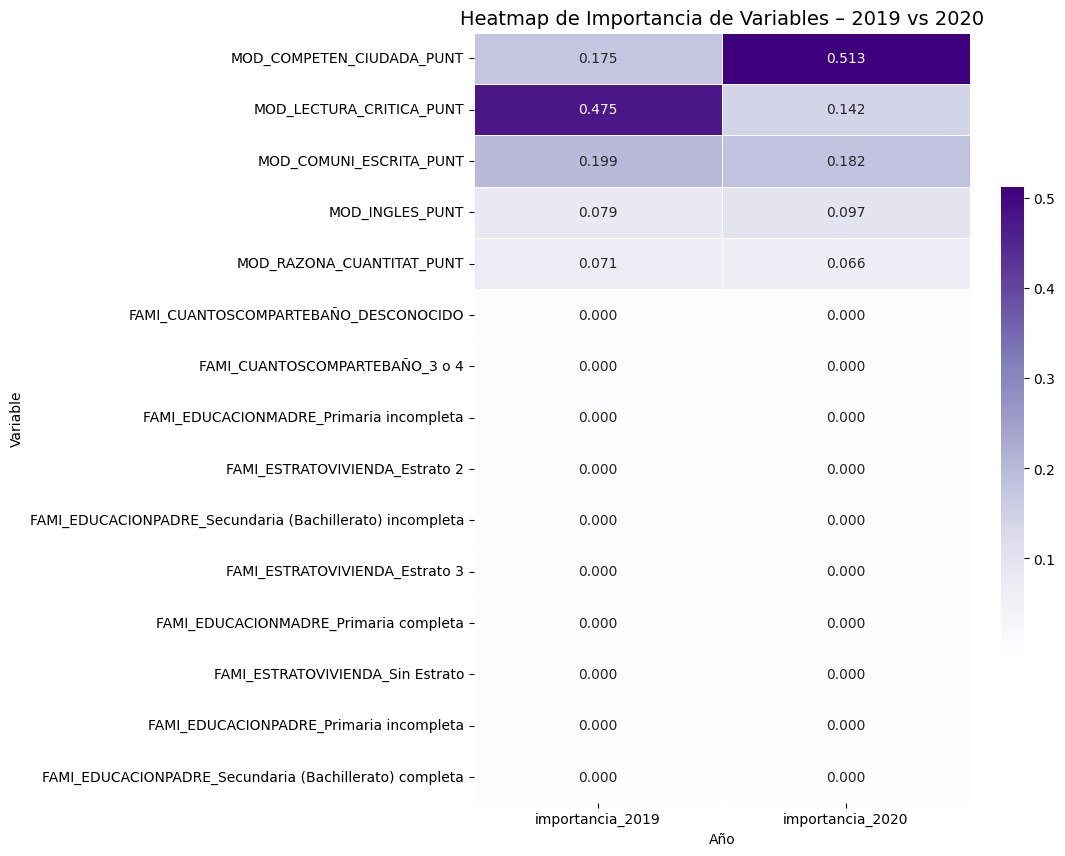

In [59]:
# ============================================
#   Heatmap de Importancia 2019 vs 2020 (TOP 15)
# ============================================

# Seleccionamos el top 15 según la suma de importancias
df_top15 = df_comp.copy()
df_top15["promedio"] = (df_top15["importancia_2019"] + df_top15["importancia_2020"]) / 2
df_top15 = df_top15.sort_values("promedio", ascending=False).head(15)

plt.figure(figsize=(8,10))
sns.heatmap(
    df_top15.set_index("variable")[["importancia_2019", "importancia_2020"]],
    annot=True,
    cmap="Purples",      #
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.6}
)
plt.title("Heatmap de Importancia de Variables – 2019 vs 2020", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Variable")
plt.show()


/tmp/ipython-input-3121885302.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


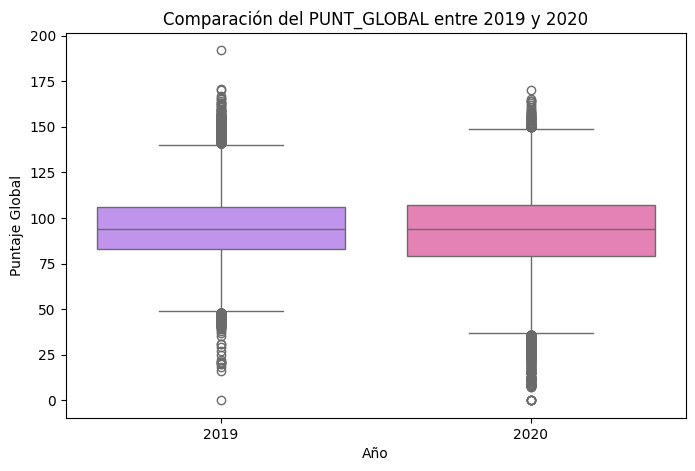

In [61]:
# ============================================
#  17. Boxplot Comparativo por Año
# ============================================

plt.figure(figsize=(8,5))

# Filtro para los dos años principales
df_box = df[df["AÑO"].isin([2019, 2020])]

sns.boxplot(
    data=df_box,
    x="AÑO",
    y="PUNT_GLOBAL",
    palette=["#c084fc", "#f472b6"]  # lila y fucsia
)

plt.title("Comparación del PUNT_GLOBAL entre 2019 y 2020")
plt.xlabel("Año")
plt.ylabel("Puntaje Global")
plt.show()


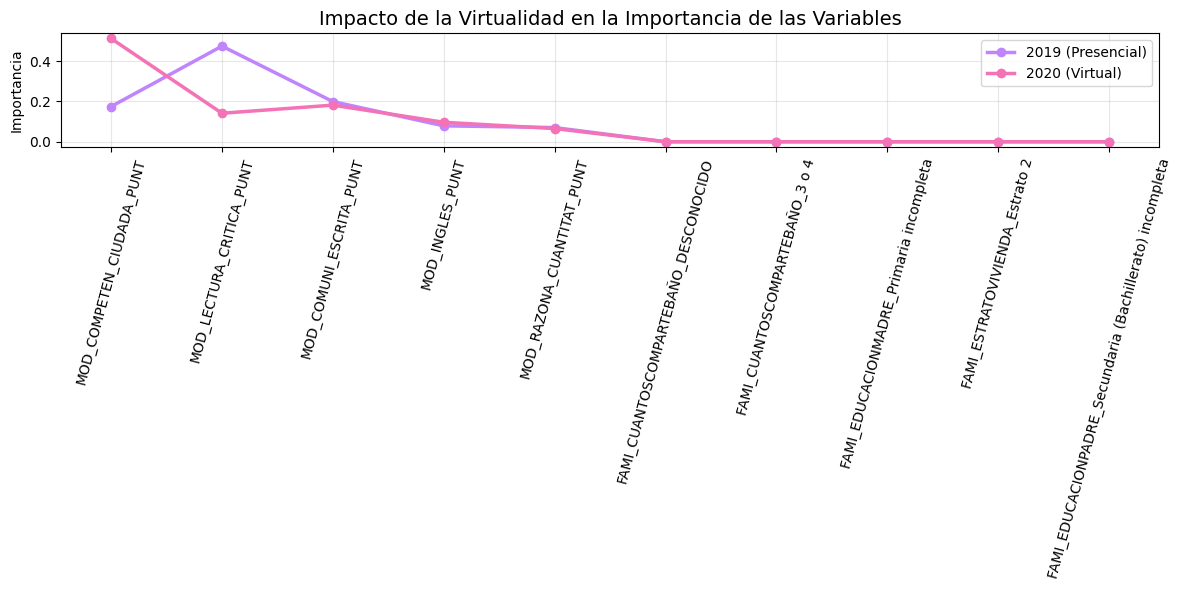

In [62]:
# ============================================
#    Impacto de la Virtualidad
# ============================================

# Fusionar por variable
comparativa = importancia_2019.merge(
    importancia_2020, on="variable", suffixes=("_2019", "_2020")
)

# Top 10 por promedio entre ambos años
comparativa["Promedio"] = (
    comparativa["importancia_2019"] + comparativa["importancia_2020"]
) / 2

top10 = comparativa.sort_values("Promedio", ascending=False).head(10)

plt.figure(figsize=(12,6))

color_2019 = "#c084fc"
color_2020 = "#f472b6"

plt.plot(top10["variable"], top10["importancia_2019"],
         marker="o", linewidth=2.5, color=color_2019, label="2019 (Presencial)")

plt.plot(top10["variable"], top10["importancia_2020"],
         marker="o", linewidth=2.5, color=color_2020, label="2020 (Virtual)")

plt.xticks(rotation=75)
plt.title("Impacto de la Virtualidad en la Importancia de las Variables", fontsize=14)
plt.ylabel("Importancia")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



**CONCLUSION**

A lo largo de este análisis fue posible identificar cómo factores socioeconómicos, familiares y tecnológicos influyen en los puntajes del examen saber TyT. Al trabajar con el modelo Random Forest se evidenció que variables como el estrato, la educación de los padres, el acceso a internet, la disponibilidad de un computador y las condiciones del hogar tienen un peso importante, y que su impacto varió entre 2019 y 2020 con el paso de la educación presencial a la virtualidad. Los resultados muestran que la modalidad remota acentuó diferencias ya existentes entre los estudiantes, especialmente en lo relacionado con los recursos disponibles en casa. Estos hallazgos resaltan la necesidad de fortalecer las estrategias para cerrar la brecha digital y mejorar el acceso a herramientas tecnológicas y espacios adecuados de estudio, de manera que tanto en contextos presenciales como virtuales se garantice un entorno educativo más equitativo.